### 1. Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. Predict the chance of default for future loans using the historical data from 2007 to 2015.

#### Data Dictionary

1. `credit.policy` - 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

2. `purpose` - The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

3. `int.rate` - The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

4. `installment` - The monthly installments owed by the borrower if the loan is funded.

5. `log.annual.inc` - The natural log of the self-reported annual income of the borrower.

6. `dti` - The debt-to-income ratio of the borrower (amount of debt divided by annual income).

7. `fico` - The FICO credit score of the borrower.

8. `days.with.cr.line` - The number of days the borrower has had a credit line.

9. `revol.bal` - The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

10. `revol.util` - The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

11. `inq.last.6mths` - The borrower's number of inquiries by creditors in the last 6 months.

12. `delinq.2yrs` - The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

13. `pub.rec` - The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

### 2. Data Extraction

In [2]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### 3. Exploratory Data Analysis

In [4]:
## Size, variables and dtypes
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.6 MB


There are total 13 input features and 1 target variable, which is not.fully.paid. The number of entries is 6704. There is one categorical variable - purpose, however, other variables which may have ordinal feature.

In [5]:
# Missing values
df.isnull().mean().sort_values(ascending=False)

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

There is no missing value in the dataset.

#### 3.1 Statistical Summary

In [6]:
# Distributions, scale, and outliers
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### 3.2 Categorical variables

In [7]:
# Cardinality
df.describe(include='O')

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


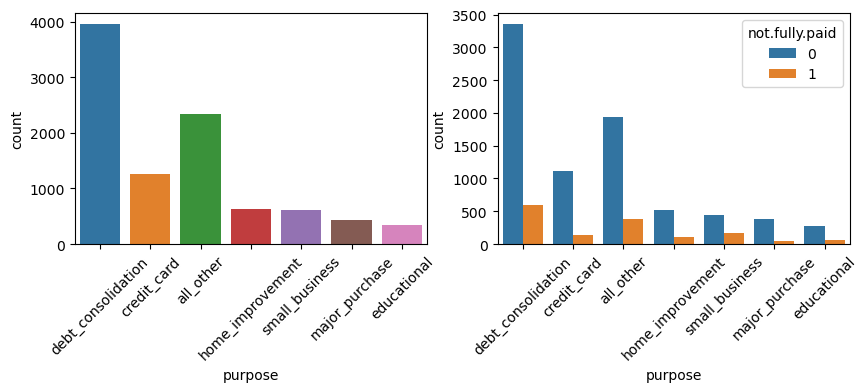

In [8]:
# Count plot
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.countplot(data=df, x='purpose')
plt.xticks(rotation=45)
plt.subplot(122)
sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.xticks(rotation=45)
plt.show()

There is no rare value in purpose. The top three loan purposes are debt consolidation, all other and credit card. Although debt consolidation and all other take account most of the not fully paid loans, the highest percentage of not fully paid loan goes to small business.

In [9]:
cat_val = []
num_val = []
for col in df.columns:
    if df[col].nunique() <= 15:
        cat_val.append(col)
    else:
        num_val.append(col)
cat_val

['credit.policy', 'purpose', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

Besides purpose, there are other categorical features - credit.policy, delinq.2yrs, pub.rec and not.fully.paid

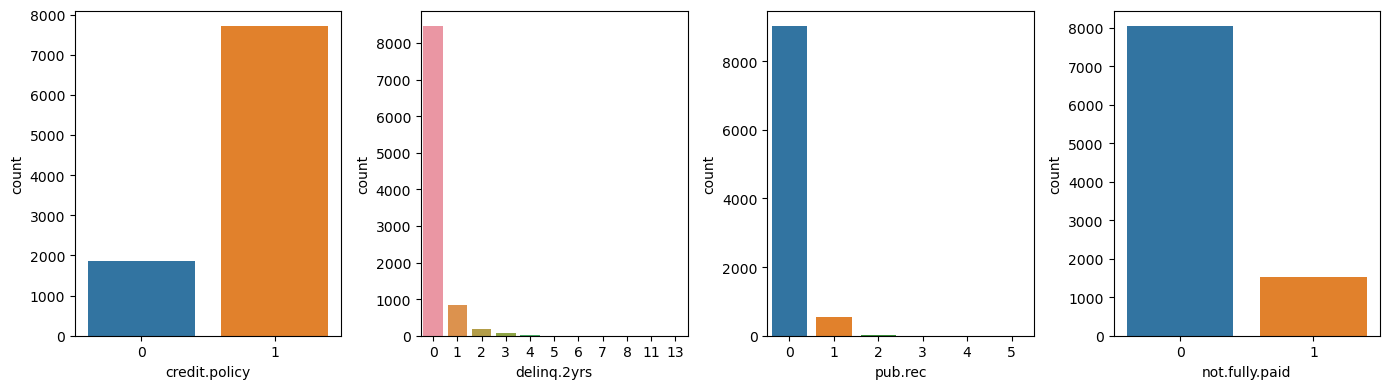

In [10]:
plt.figure(figsize=(14,4))
i=1
for col in cat_val:
    if col=='purpose':
        continue
    plt.subplot(1,4,i)
    i+=1
    sns.countplot(data=df, x=col)
    plt.tight_layout()

The majority of customers meet the credit underwriting criteria. Most borrowers never have past-due payment, or derogatory public records. Most of customers are able to pay the loan fully.

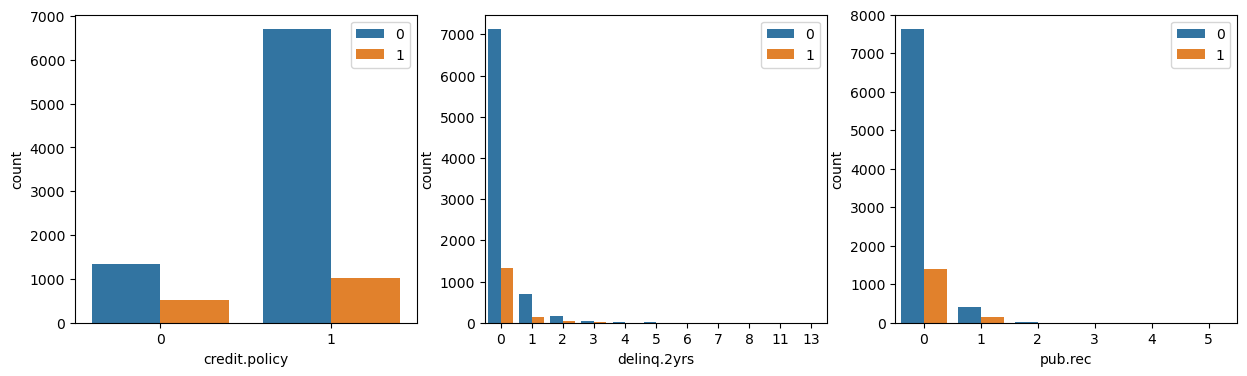

In [11]:
plt.figure(figsize=(15, 4))
i = 1
for col in cat_val:
    if col=='not.fully.paid' or col=='purpose':
        continue
    plt.subplot(1, 3, i)
    i += 1
    sns.countplot(data=df, x=col, hue='not.fully.paid')
    plt.legend()
    plt.xlabel(col)

- **credit.policy**: There are about 15% of customers who meet the credit underwriting critera but failed to pay the loan fully, and there are about 70% of customers who do not meet the credit underwriting criteria but still able to pay the full loan. 
- **delinq.2yrs**: There are 20% of customers who have no past-due history are not able to pay loan fully. 
- **pub.rec**: A slightly lower percentage goes to the customers who have not derogatory public records.

In [12]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
cat_corr = []
for col in cat_val:
    if col=='not.fully.paid':
        continue
    cat_corr.append((col, list(ss.chi2_contingency(pd.crosstab(
                 df[col], df['not.fully.paid'])))[1]))
cat_corr.sort(key=lambda x:x[1])
cat_corr

[('credit.policy', 8.87573133930704e-54),
 ('purpose', 1.0672453117980422e-18),
 ('pub.rec', 1.830777027585089e-07),
 ('delinq.2yrs', 0.8680013883658166)]

From chi-sqaure test, we can see that credit.policy, purpose and pub.rec have strong correlation with target variable, while delinq.2yrs has almost no correlation.

#### 3.3 Numerical variables

In [13]:
# Distributions
d = {'mean': df[num_val].mean(),
     'median': df[num_val].median(),
     'min': df[num_val].min(),
     'max': df[num_val].max(),
     'skew': df[num_val].skew()}

stats = pd.DataFrame(d)
stats.sort_values(by='skew', key=lambda x:-abs(x))

,mean,median,min,max,skew
revol.bal,16913.963876,8596.000000,0.000000,1.207359e+06,11.161058
inq.last.6mths,1.577469,1.000000,0.000000,3.300000e+01,3.584151
days.with.cr.line,4560.767197,4139.958333,178.958333,1.763996e+04,1.155748
installment,319.089413,268.950000,15.670000,9.401400e+02,0.912522
fico,710.846314,707.000000,612.000000,8.270000e+02,0.471260
int.rate,0.122640,0.122100,0.060000,2.164000e-01,0.164420
revol.util,46.799236,46.300000,0.000000,1.190000e+02,0.059985
log.annual.inc,10.932117,10.928884,7.547502,1.452835e+01,0.028668
dti,12.606679,12.665000,0.000000,2.996000e+01,0.023941


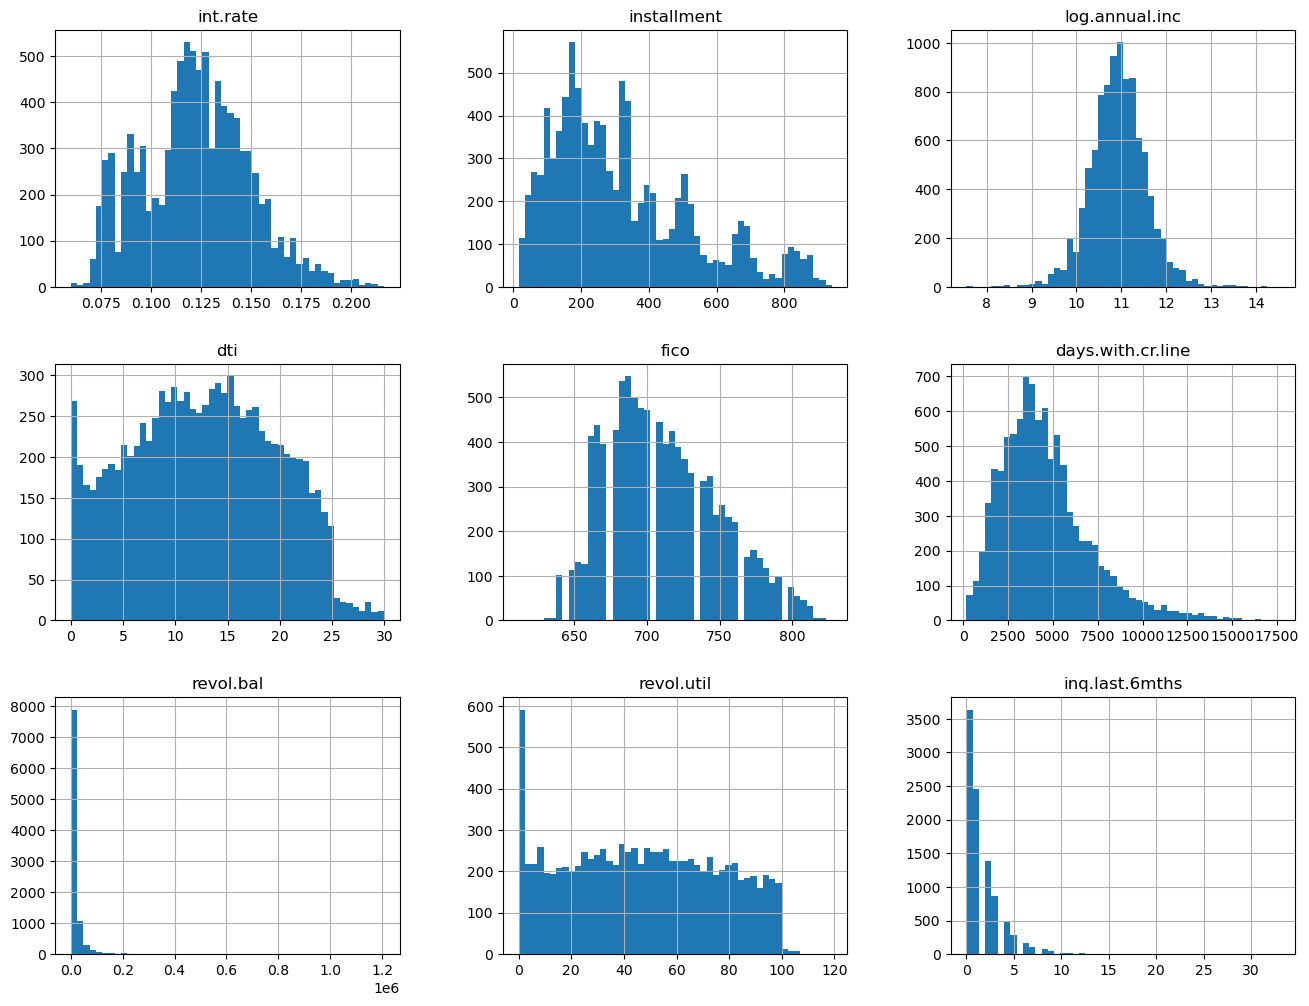

In [14]:
# Histogram
df[num_val].hist(bins=50, figsize=(16,12))
plt.show()

Most of the numerical variables are right-skewed. Among them, revol.bal, inq.last.6mths	and days.with.cr.line have skewness larger than 1.

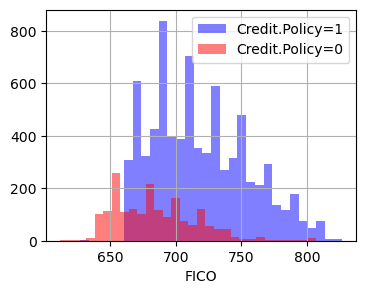

In [15]:
plt.figure(figsize=(4,3))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

Above is a plot of histogram of FICO credit score of the borrowers who meet the credit policy and who do not meet. We can see that those who meet credit policy usually have FICO score > 660.

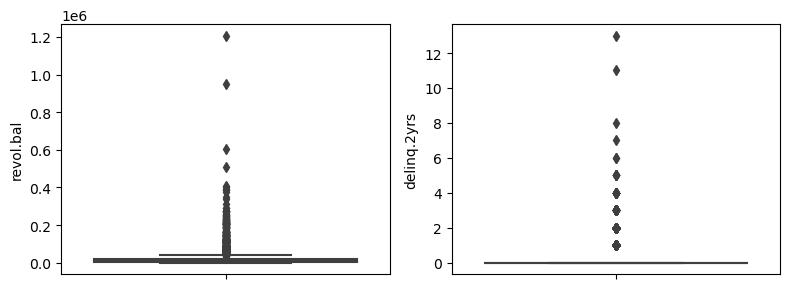

In [16]:
# Outliers
# Box plot
num_cols = ['revol.bal', 'delinq.2yrs']
facet = None
for i in range(0, len(num_cols), 2):
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    sns.boxplot(y=df[num_cols[i]])
    plt.subplot(122)
    sns.boxplot(y=df[num_cols[i+1]])
    plt.tight_layout()
    plt.show()

We know there could be outliers due to the skewness, we plot the most two skewed variables.

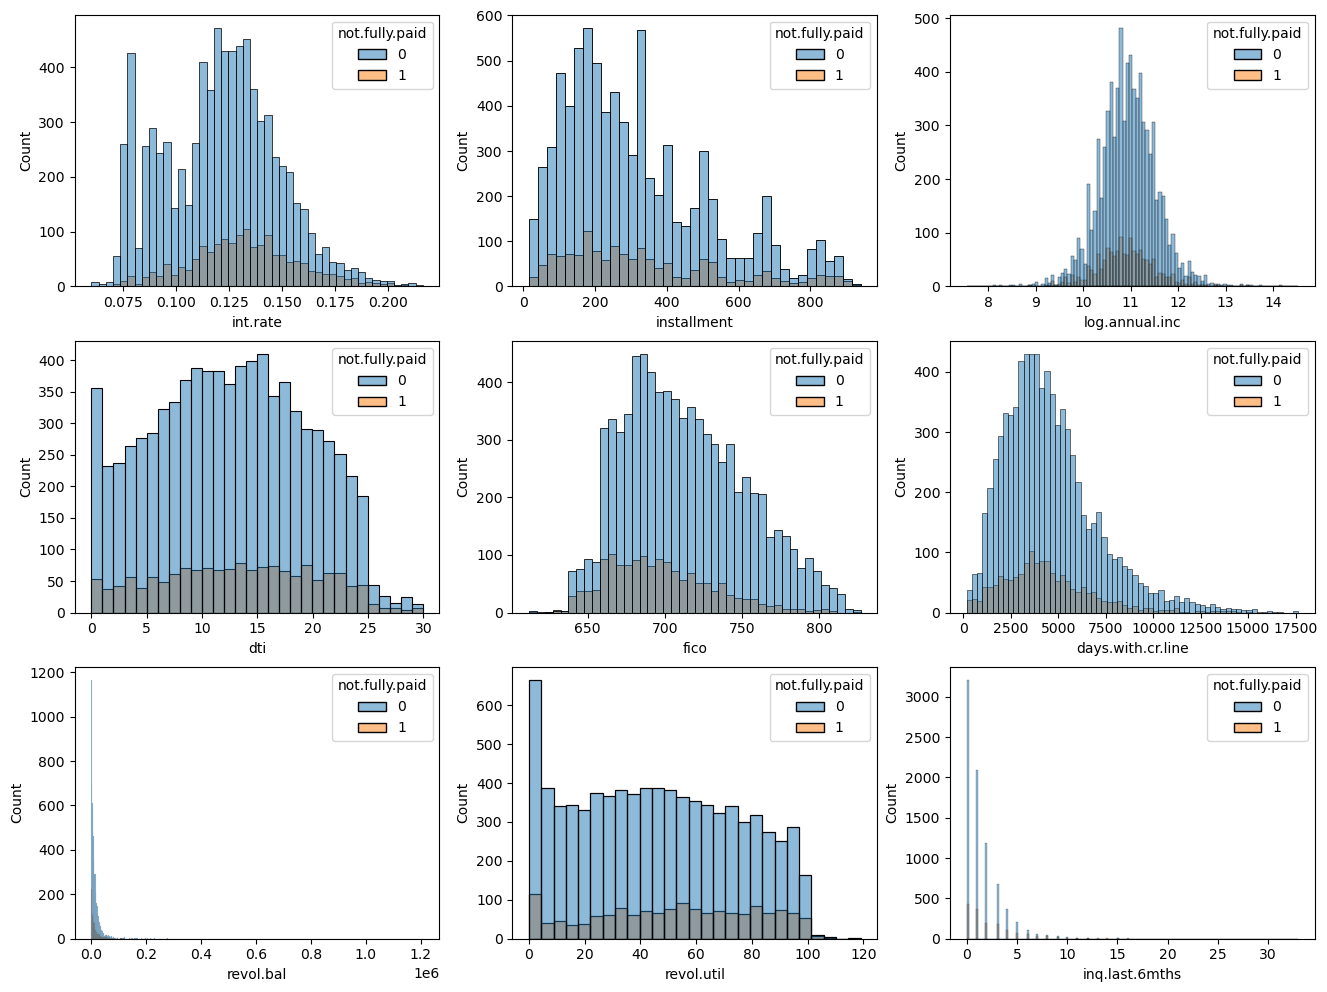

In [17]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_val, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='not.fully.paid')
    plt.xlabel(col)

It is hard to tell the correlation between numerical variables and the target variable from the histograms.

In [18]:
num_corr = []
for col in num_val:
    num_corr.append((col, ss.f_oneway(df[col], df['not.fully.paid'])[1]))
num_corr.sort(key=lambda x:x[1])
num_corr

[('installment', 0.0),
 ('log.annual.inc', 0.0),
 ('dti', 0.0),
 ('fico', 0.0),
 ('days.with.cr.line', 0.0),
 ('revol.bal', 0.0),
 ('revol.util', 0.0),
 ('inq.last.6mths', 0.0),
 ('int.rate', 2.6154942238124084e-23)]

From ANOVA test, we can see that all the numerical variables are correlated with target variable.

### 4. Feature Engineering

In [19]:
# Handling imbalanced data
fully_paid = df[df['not.fully.paid'] == 0]
not_fully_paid = df[df['not.fully.paid'] == 1]

#handling imbalanced data
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid, replace = True, n_samples = fully_paid.shape[0])
df_balanced = pd.concat([fully_paid, df_minority_upsampled])

from sklearn.utils import shuffle
df_balanced = shuffle(df_balanced)

In [21]:
from sklearn.model_selection import train_test_split
# imbalanced dataset
y = df['not.fully.paid']
X = df.drop(columns=['not.fully.paid'])

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

# balanced dataset
y_b = df_balanced['not.fully.paid']
X_b = df_balanced.drop(columns=['not.fully.paid'])

X_train_b,X_val_b,y_train_b,y_val_b=train_test_split(X_b,y_b,test_size=0.3,stratify=y_b,random_state=0)

In [22]:
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler

# ordinal encoder
encoder = OrdinalEncoder()

# Yeo-Johnson (exponential transformation with automatic search including negative values)
transformer = YeoJohnsonTransformer()

# Winsorizer() caps maximum and / or minimum values of a variable
capper = Winsorizer(capping_method='iqr', tail='both')

# standardization
scaler =  StandardScaler()

### 5. Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=3)

In [24]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

cat_val2 = [col for col in cat_val if col != 'not.fully.paid']

numeric_transformer = Pipeline(
    steps=[
           ("Transformer", transformer), 
           ('Capper', capper),
           ("Scaler", scaler)
          ]
)

ct = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_val),
        ("cat", selector, cat_val2),
    ],
    remainder="passthrough"
)

preprocessor = make_pipeline(encoder,
                             ct)

In [25]:
X_train_tr = preprocessor.fit_transform(X_train,y_train)
X_val_tr = preprocessor.transform(X_val)

preprocessor.get_feature_names_out()

array(['num__int.rate', 'num__installment', 'num__log.annual.inc',
       'num__dti', 'num__fico', 'num__days.with.cr.line',
       'num__revol.bal', 'num__revol.util', 'num__inq.last.6mths',
       'cat__credit.policy', 'cat__purpose', 'cat__pub.rec'], dtype=object)

In [26]:
X_train_b_tr = preprocessor.fit_transform(X_train_b,y_train_b)
X_val_b_tr = preprocessor.transform(X_val_b)

preprocessor.get_feature_names_out()

array(['num__int.rate', 'num__installment', 'num__log.annual.inc',
       'num__dti', 'num__fico', 'num__days.with.cr.line',
       'num__revol.bal', 'num__revol.util', 'num__inq.last.6mths',
       'cat__credit.policy', 'cat__purpose', 'cat__pub.rec'], dtype=object)

As expected, the categorical variable delinq.2yrs is removed from the feature list. So far, we have two copies of datasets, one is imbalanced and one is balanced.

### 6. Model Selection

In [27]:
# Import algorithms to try
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [28]:
# Define algorithms to try
algorithms = []
algorithms.append(('Logistic Regression', LogisticRegression()))
algorithms.append(('Linear SVM', SVC()))
algorithms.append(('Random Forest', RandomForestClassifier()))
algorithms.append(('XGBoost',XGBClassifier()))


In [29]:
def train(X_train_tr, y_train, X_val_tr, y_val):
    
    # Initialize lists
    names = []
    train_accuracy = []
    test_accuracy = []
    cv_score = []
    runtime = []
   
     # Iterate ofer each element in algorithms
    for name, clf in algorithms:
        t1 = time.time()
        names.append(name)
        clf.fit(X_train_tr, y_train)

        train_accuracy.append(accuracy_score(y_train, clf.predict(X_train_tr)))
        test_accuracy.append(accuracy_score(y_val, clf.predict(X_val_tr)))
        
        result = cross_val_score(clf, np.vstack((X_train_tr, X_val_tr)), 
                           np.hstack((y_train, y_val)), cv=5, scoring='accuracy')

        cv_score.append(np.mean(result))

        t2 = time.time()
        runtime.append(t2-t1)
    
    return names, train_accuracy, test_accuracy, cv_score, runtime

In [30]:
# Train the models with imbalanced data
names, train_accuracy, test_accuracy, cv_score, runtime = train(X_train_tr, y_train, X_val_tr, y_val)

# Create comparison dataframe
model_comparison = pd.DataFrame({'Algorithm': names,
                                 'Train accuracy': train_accuracy,
                                 'Val accuracy': test_accuracy,
                                 'CV score': cv_score,
                                 'Runtime': runtime,})

# Sort by Test_RMSE
model_comparison.sort_values(by=['CV score'], ascending=False)

,Algorithm,Train accuracy,Val accuracy,CV score,Runtime
0,Logistic Regression,0.841438,0.839248,0.840990,0.145226
1,Linear SVM,0.839946,0.839944,0.839946,21.727717
2,Random Forest,1.000000,0.837161,0.837439,7.701736
3,XGBoost,0.962261,0.824287,0.823136,3.058063


In [31]:
# Train the models with balanced data
names, train_accuracy, test_accuracy, cv_score, runtime = train(X_train_b_tr, 
                                                    y_train_b, X_val_b_tr, y_val_b)

# Create comparison dataframe
model_comparison = pd.DataFrame({'Algorithm': names,
                                 'Train accuracy': train_accuracy,
                                 'Val accuracy': test_accuracy,
                                 'CV score': cv_score,
                                 'Runtime': runtime,})

# Sort by validation accuracy
model_comparison.sort_values(by=['CV score'], ascending=False)

,Algorithm,Train accuracy,Val accuracy,CV score,Runtime
2,Random Forest,1.000000,0.965610,0.974270,10.893468
3,XGBoost,0.968658,0.875906,0.885768,3.610029
1,Linear SVM,0.672556,0.644914,0.660534,71.447496
0,Logistic Regression,0.629584,0.623990,0.629646,0.203145


There is a huge improvement in performance when using balanced data. The best accuracy increased from 0.84 to 0.97. Interestingly, the performance of linear algorithms such as logistic regression and linear SV on balanced data degraded, while tree-based algorithms perform much better on balanced data. Next, we will fine tune Randome Forest on balanced data.

### 7. Hyperparameter Tuning

In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [30, 50, 100, 200, 500], 
    'randomforestclassifier__criterion': ['gini', 'entropy'], 
    'randomforestclassifier__max_depth': [3, 5, None], 
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    }

clf = RandomForestClassifier() 

full_pipe = make_pipeline(preprocessor,
                          clf
                         )

random_search = RandomizedSearchCV(full_pipe, param_grid, cv=5, n_iter=100, 
                                   scoring='accuracy', n_jobs=-1, verbose=1)

In [41]:
random_search.fit(X_b, y_b)
print("Best parameters:")
print(random_search.best_params_)
print("Best score:")
print(random_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:
{'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__criterion': 'gini'}
Best score:
0.9736482287134866


### Conclusion

This project aims to predict whether a loan can be default or not (i.e. fully paid or not) based on borrower's banking and credit information. Applied feature engineering techinques include data balancing, ordinal encoder, transformation, winsorization and standardization. Hyperthesis testing tools such as ANOVA and chi-square are used for correlation analysis and feature selection. Baseline model performance results show that by balancing original data, the validation accuracy has been improved from 0.84 to 0.97. Further hyperparameter tuning on the best model does not seem to lead to another performance peak.